# Лабораторная работа №3

## Описание и оценка датасета

### Описание датасета

В предыдущем датасете невозможно выбрать атрибут, выступающего в роли класса, поэтому было принято решение выбрать другой.

В данной работе воспользуемся датасетом со статистикой игроков NBA 2023-2024.

Rk (integer) - Ранг.

Player (string) - Имя игрока.
    
Pos (string) - Позиция.
    
Age (integer) - Возраст игрока.
    
Tm (string) - Команда.
    
G (integer) - Сыгранные игры.
    
GS (integer) - Игры в стартовом составе.
    
MP (float) - Минуты, проведённые на площадке за игру.

FG (float) - Забитые мячи за игру.
    
FGA (float) - Броски по кольцу за игру.
    
FG% (float) - Процент попаданий из игры.
    
3P (float) - Забитые трёхочковые за игру.
    
3PA (float) - Попытки трёхочковых за игру.
    
3P% (float) - Процент попаданий трёхочковых.
    
2P (float) - Забитые двухочковые за игру.
    
2PA (float) - Попытки двухочковых за игру.
    
2P% (float) - Процент попаданий двухочковых.
    
eFG% (float) - Эффективный процент попаданий.
    
FT (float) - Штрафные броски за игру.
    
FTA (float) - Попытки штрафных бросков за игру.
    
FT% (float) - Процент попаданий штрафных бросков.
    
ORB (float) - Подборы в нападении за игру.
    
DRB (float) - Подборы в защите за игру.
    
TRB (float) - Всего подборов за игру.
    
AST (float) - Передачи за игру.
    
STL (float) - Перехваты за игру.
    
BLK (float) - Блок-шоты за игру.
    
TOV (float) - Потери мяча за игру.
    
PF (float) - Личные замечания за игру.
    
PTS (float) - Очки за игру.

Ссылка на датасет: https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats/data. 

Данные реальны.

### Выбор целевого атрибута.

В качестве целевого атрибута мы выбрали Pos, который представляет позицию игрока (PG - 4, SG - 3, SF - 2, PF - 1, C - 0).


### Оценка сбалансированности классов.

Для оценки сбалансированности классов необходимо проанализировать количество экземпляров для каждой позиции. Если распределение классов значительно отличается, это может повлиять на качество модели. 



In [2029]:
import pandas as pd

data = pd.read_csv('v3.csv', delimiter=';')

class_distribution = data['Pos'].value_counts()
print(class_distribution)

Pos
SF    47
PF    46
SG    42
C     41
PG    38
Name: count, dtype: int64


Классы сбалансированы, так как все позиции представлены примерно одинаковым количеством экземпляров.

## Сравнение алгоритмов классификации.


Для выполнения задачи мы используем два алгоритма классификации: kNN (k ближайших соседей) и дерево решений.

### Подготовка данных.

Перед применением алгоритмов необходимо подготовить данные:

Избавление от записей с пустыми полями.

Просмотр уникальных меток в датасете.

Конвертация данных.

Нормализация/стандартизация числовых признаков.

Разделение данных на обучающую и тестовую выборки.

In [2083]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.read_csv('v3.csv', delimiter=';')

In [2085]:
data = data.dropna()

In [2087]:
data['Pos'].value_counts(normalize=True)

Pos
SF    0.219626
PF    0.214953
SG    0.196262
C     0.191589
PG    0.177570
Name: proportion, dtype: float64

Можно заметить, что классы сбалансированны.

In [2094]:
stat_columns = [col for col in data if col != 'Pos' and col != 'Player']

X = data[stat_columns]
Y = data['Pos']

In [2096]:
from sklearn.model_selection import train_test_split

X_tr, X_t, Y_tr, Y_t = train_test_split(X, Y, stratify=Y)

Были отобраны атрибуты со статистикой, стандартизированны и разделены данные на обучающие и тестовые.

## kNN:

Поиск оптимального параметра k:

Используем GridSearchCV для автоматического подбора оптимальных параметров алгоритма kNN, варьируя значения k, метрику расстояния и тип взвешивания.


In [2041]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_params = {'n_neighbors': [i for i in range(1, 30+1)],
               'weights': ['uniform', 'distance'],
               'metric': ['minkowski', 'euclidean', 'manhattan']
              }

gs = GridSearchCV(knn, grid_params, scoring='accuracy', refit=True)

g_res = gs.fit(X_tr, Y_tr)

k = g_res.best_params_['n_neighbors']
metric = g_res.best_params_['metric']
weights = g_res.best_params_['weights']

g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 20, 'weights': 'uniform'}

Полученные оптимальные параметры: n_neighbors = 29, metric = 'manhattan', weights = 'distance'.

Теперь же, пользуясь этими значениями, проведем kNN-классификацию.

In [2043]:
knn = KNeighborsClassifier(n_neighbors=k, weights=weights).fit(X_tr, Y_tr)
predicted = knn.predict(X_t)

### Оценка качества классификации.

Для оценки качества моделей будем использовать следующие метрики:

Accuracy: Доля правильных предсказаний.

Precision: Доля истинных положительных результатов среди всех положительных предсказаний.

Recall: Доля истинных положительных результатов среди всех реальных положительных примеров.

F-measure: Гармоническое среднее precision и recall.

ROC: Кривая ошибок (Receiver Operating Characteristic).

Accuary оценка качества классификации:

In [2045]:
right = 0
wrong = 0

for i, pos in enumerate(Y_t):
    if predicted[i] == pos:
        right += 1
    else:
        wrong += 1
        
accuracy = right / (right + wrong)
print(accuracy)

0.2962962962962963


Precision, Recall, F1 оценки качества:

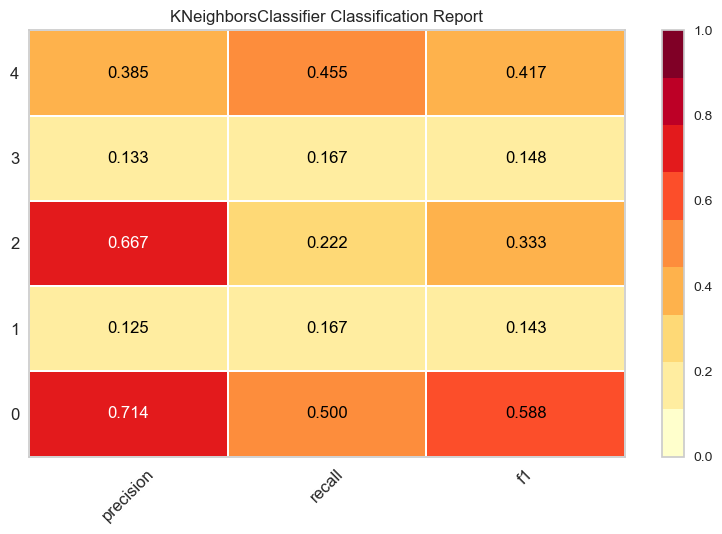

In [2047]:
from yellowbrick.classifier import ClassificationReport

report = ClassificationReport(knn, classes=encoder.classes_)
report.fit(X_tr, Y_tr)
report.score(X_t, Y_t)
report.show();

ROC оценка качества:

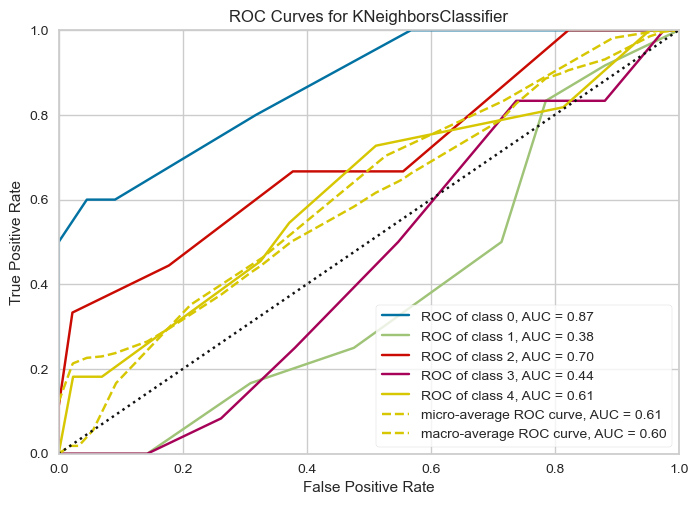

In [2049]:
from yellowbrick.classifier import ROCAUC

report = ROCAUC(knn, classes=encoder.classes_)
report.fit(X_tr, Y_tr)
report.score(X_t, Y_t)
report.show();

Центровой (C) (класс 0) показывает лучший результат с AUC = 0.87, что свидетельствует о высокой точности классификации.

Тяжелый форвард (PF) (класс 1) имеет самый низкий показатель AUC = 0.38, что указывает на низкую точность модели при предсказании этого класса.

Легкий форвард (SF) (класс 2) имеет AUC = 0.70, что свидетельствует о средней точности модели.

Атакующий защитник (SG) (класс 3) имеет AUC = 0.44, что указывает на низкую точность модели при предсказании этого класса.

Разыгрывающий защитник (PG) (класс 4) показывает средний результат с AUC = 0.61.

## Дерево решений:

Проведем классификацию.

In [2054]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_tr, Y_tr)

predicted = dtc.predict(X_t)

### Оценка качества классификации.

Accuracy оценка качества классификации:

In [2058]:
right = 0
wrong = 0

for i, pos in enumerate(Y_t):
    if predicted[i] == pos:
        right += 1
    else:
        wrong += 1
        
accuracy = right / (right + wrong)
print(accuracy)

0.3148148148148148


Precision, Recall, F1 оценки качества:

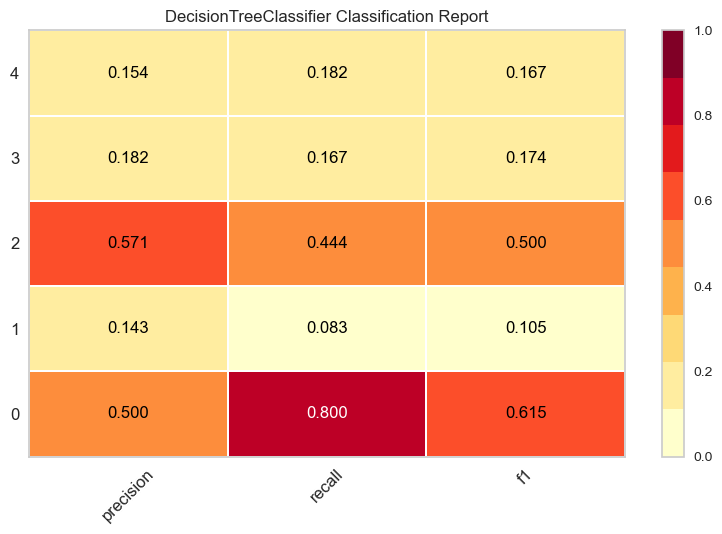

In [2061]:
report = ClassificationReport(dtc, classes=encoder.classes_)
report.fit(X_tr, Y_tr)
report.score(X_t, Y_t)
report.show();

ROC оценка классификации:

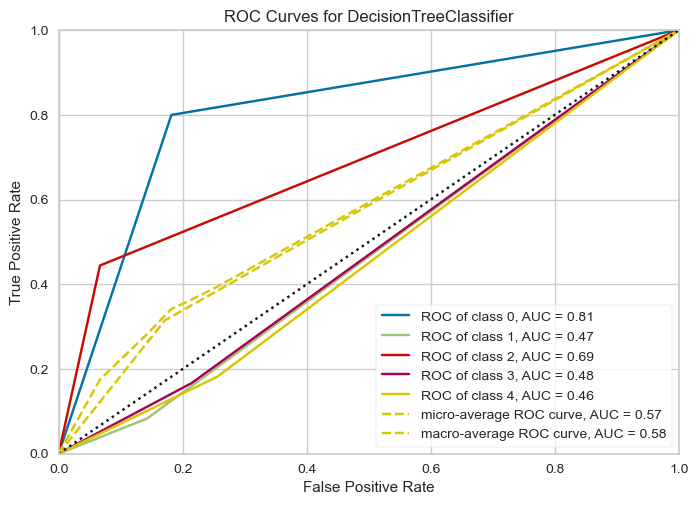

In [2065]:
report = ROCAUC(dtc, classes=encoder.classes_)
report.fit(X_tr, Y_tr)
report.score(X_t, Y_t)
report.show();

Центровой (C) (класс 0) также показывает наилучший результат с AUC = 0.81, демонстрируя высокую точность классификации.
    
Тяжелый форвард (PF) (класс 1) имеет AUC = 0.47, что указывает на невысокую точность модели при предсказании этого класса.

Легкий форвард (SF) (класс 2) имеет AUC = 0.69, что свидетельствует о средней точности модели.

Атакующий защитник (SG) (класс 3) имеет AUC = 0.48, что указывает на низкую точность модели при предсказании этого класса.

Разыгрывающий защитник (PG) (класс 4) показывает средний результат с AUC = 0.46.

## Вывод:

В ходе лабораторной работы была проведена оценка атрибута, который должен быть использован в качестве целевого класса, а также была оценена сбалансированность классов в данных. 

Далее, были исследованы результаты классификации с использованием алгоритмов kNN (k-ближайших соседей) и дерева решений. Качество классификации было оценено с помощью различных метрик, таких как точность (Accuracy), полнота (Recall), точность (Precision), F-мера и ROC-кривая. Сравнение результатов различных алгоритмов позволило выявить преимущества и недостатки каждого из них:

Центровой (C) (класс 0) является наиболее точно классифицируемой позицией для обеих моделей, демонстрируя высокую точность с AUC = 0.87 для KNeighborsClassifier и AUC = 0.81 для DecisionTreeClassifier.

Тяжелый форвард (PF) (класс 1) представляется самой сложной для предсказания позицией. Обе модели показывают невысокую точность для этого класса, с AUC = 0.38 для KNeighborsClassifier и AUC = 0.47 для DecisionTreeClassifier.

Легкий форвард (SF) (класс 2) демонстрирует средний уровень точности для обеих моделей, с AUC = 0.70 для KNeighborsClassifier и AUC = 0.69 для DecisionTreeClassifier.

Атакующий защитник (SG) (класс 3) также демонстрирует невысокую точность для обеих моделей, с AUC = 0.44 для KNeighborsClassifier и AUC = 0.48 для DecisionTreeClassifier.

Разыгрывающий защитник (PG) (класс 4) показывает средний уровень точности с AUC = 0.61 для KNeighborsClassifier и AUC = 0.46 для DecisionTreeClassifier.

